First we need to get the files.

In [1]:
from os import listdir, makedirs
from os.path import isfile, join, dirname
from datetime import datetime
from io_utils import parser, load_sensor_data, write_sensor_data, file_names
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

/Users/huynguyen/tensorflow-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/huynguyen/tensorflow-py3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


Here we showcase a time series from the data, just to give a feel of how the data looks.

In [2]:
showcase_series = load_sensor_data(file_names[32])

In [3]:
showcase_series.shape

(276048, 18)

We now proceed to plot the showcase data. We cannot do this straight away because the number of data points are huge and thus plotting will consume a lot of time. Instead, we downsample the data first.

In [4]:
resampled_data = showcase_series.resample("5D").mean()

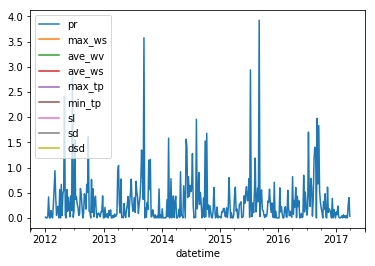

In [5]:
resampled_data[resampled_data.columns.drop(list(resampled_data.filter(regex="f_")))].plot()
plt.show()

We now proceed to downsample **all** the files.

In [6]:
sampling_rate = 'D'

In [7]:
for file_name in file_names:
    sensor_dataframe = load_sensor_data(file_name)
    resampled_dataframe = sensor_dataframe.resample(sampling_rate).mean()
    write_sensor_data(resampled_dataframe, destination=join('./resampled', file_name))

ValueError: time data '11001' does not match format '%Y%m%d%H%M'